# **FEATURE EXTRACTION AND OBJECT DETECTION**

# **OPENCV_CONTRIB INSTALLATION**

In [1]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,584 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,156 kB]
Hit:14 https://ppa.

# **SIFT Feature Extraction**

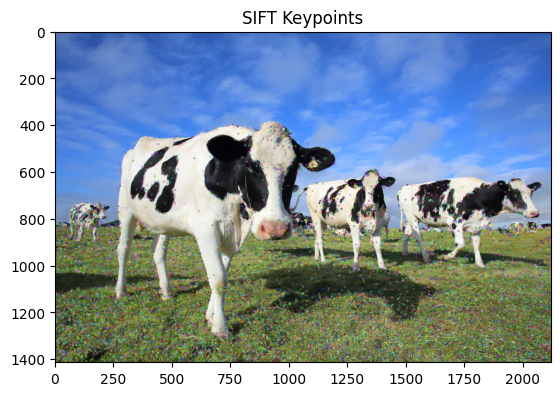

In [17]:
import cv2
import matplotlib.pyplot as plt

#Load the image
image = cv2.imread('/content/cow1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Initialize SIFT detector
sift = cv2.SIFT_create()

#Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

sift_image_with_keypoints = cv2. drawKeypoints(image, keypoints, None)

#Display the image with keypoints
plt.imshow(cv2.cvtColor(sift_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

# **SURF Feature Extraction**

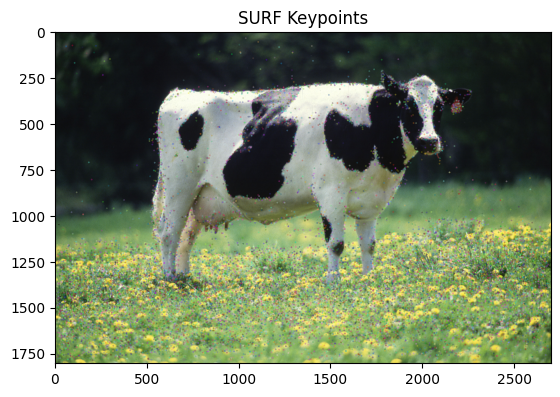

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('/content/cow2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
surf_image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the result
plt.imshow(cv2.cvtColor(surf_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()


# **ORB Feature Extraction**

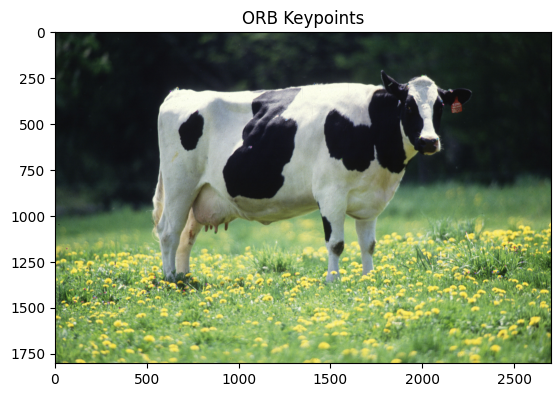

In [19]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/cow2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector - Call the function to create the ORB object
orb = cv2.ORB_create()

keypoints, descriptors = orb.detectAndCompute(gray_image, None)

orb_image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

plt.imshow(cv2.cvtColor(orb_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

# **Feature Matching**

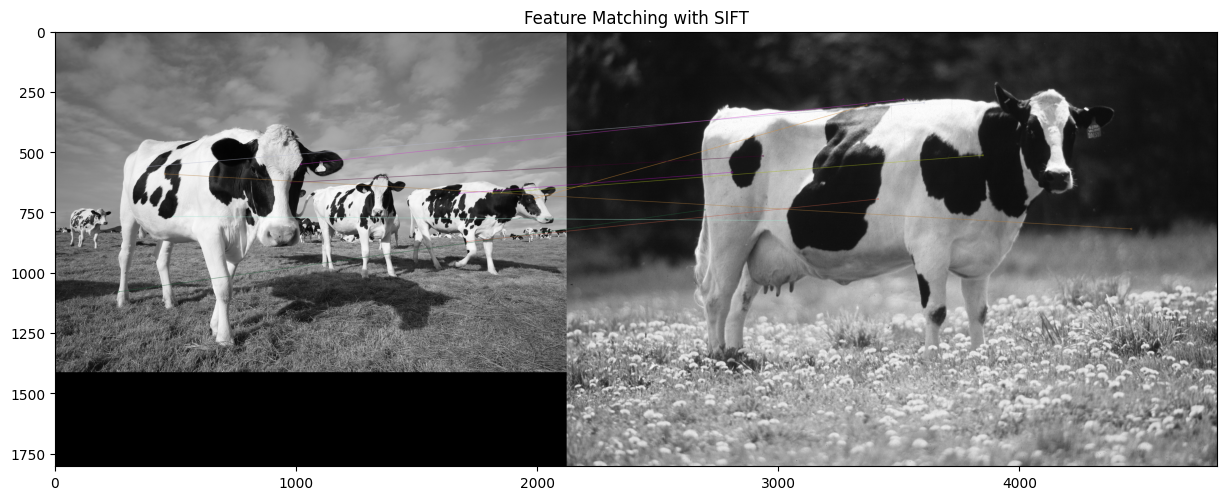

In [20]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('/content/cow1.jpg', 0)
image2 = cv2.imread('/content/cow2.jpg', 0)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

# **Real-World Applications (Image Stitching using Homography)**

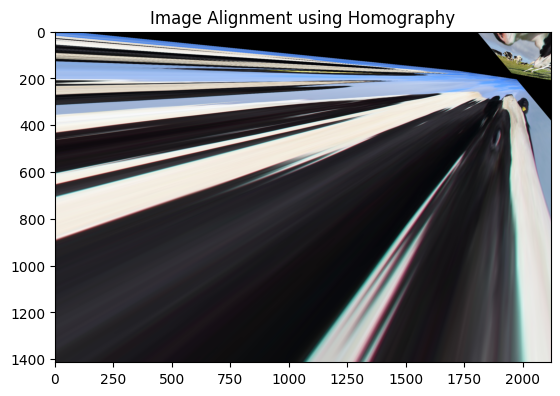

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image1 = cv2.imread('/content/cow1.jpg')
image2 = cv2.imread('/content/cow2.jpg')

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.67 * n.distance:
        good_matches.append(m)

src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]
).reshape(-1, 1, 2)

dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]
).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Unpacking height and width correctly
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image Alignment using Homography')
plt.show()


# **Combining SIFT and ORB**

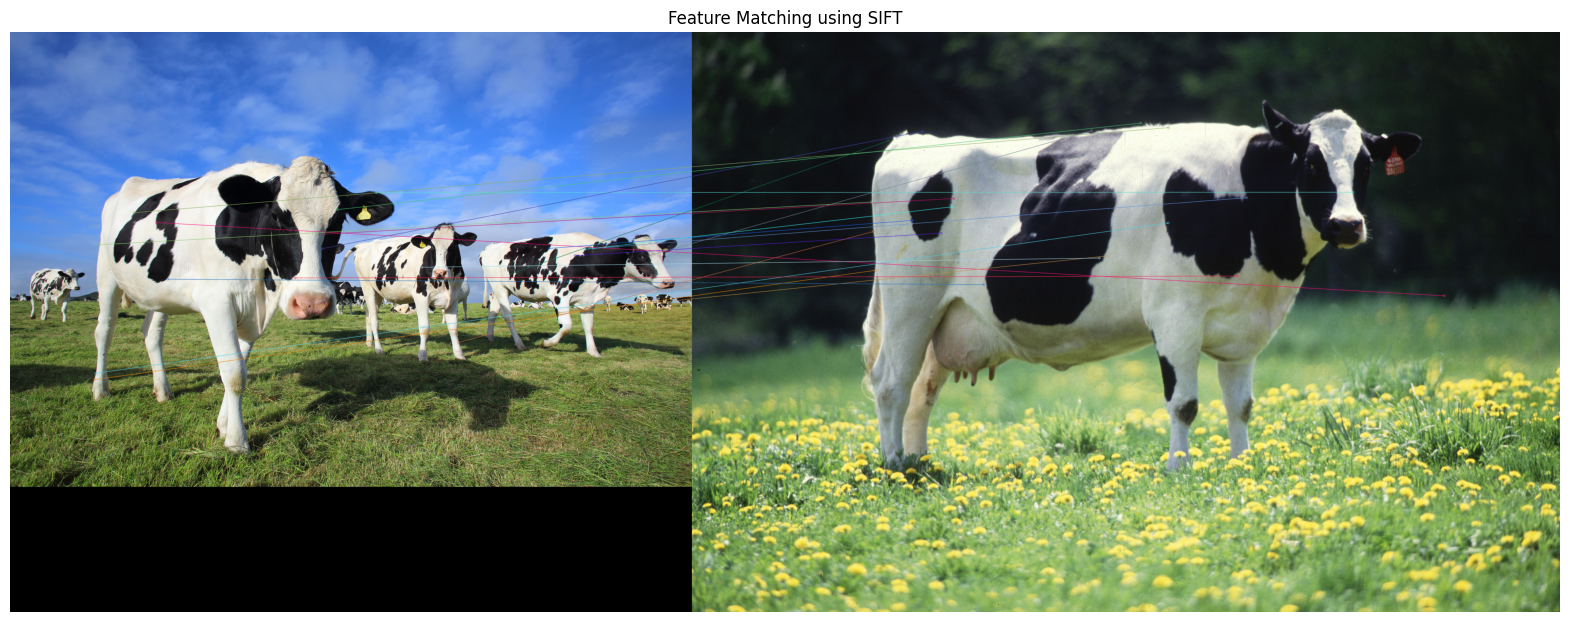

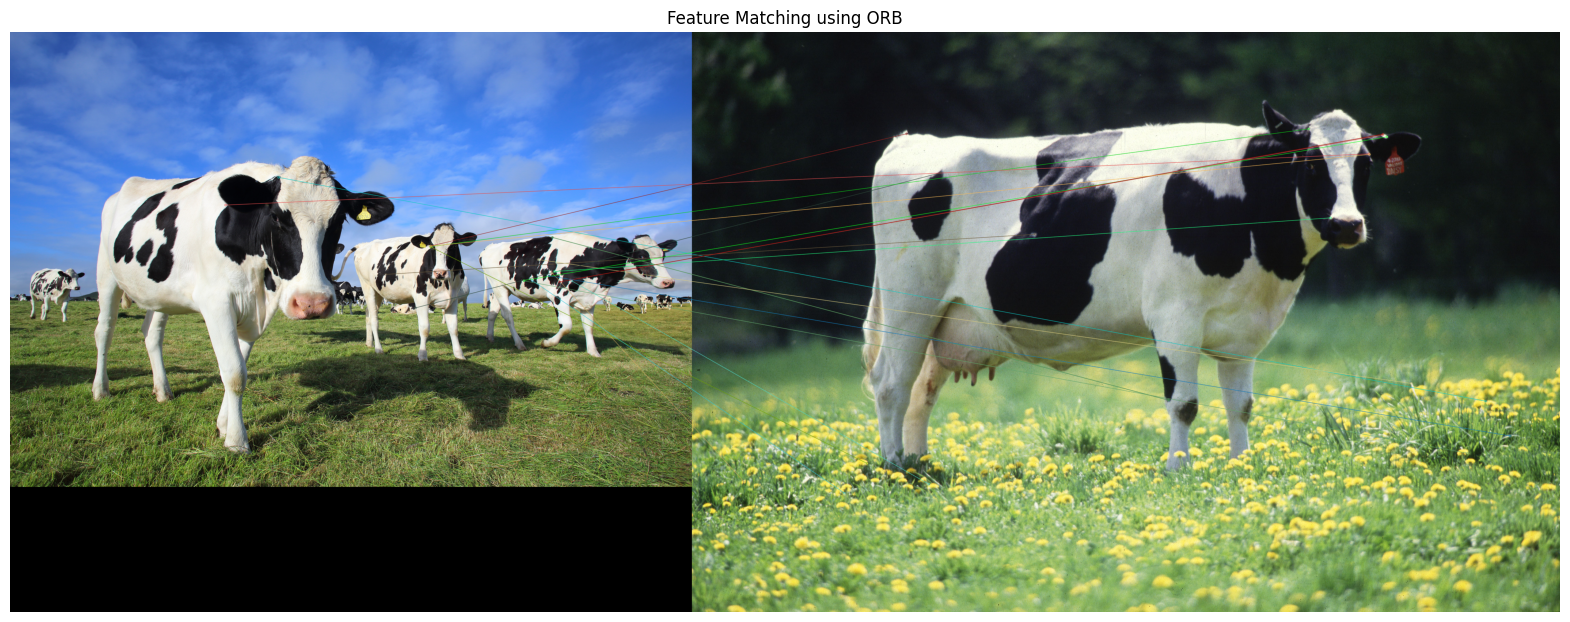

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load images
image1 = cv2.imread('/content/cow1.jpg')
image2 = cv2.imread('/content/cow2.jpg')

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors using SIFT
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# Detect and compute keypoints and descriptors using ORB
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Match descriptors using BFMatcher for SIFT
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Match descriptors using BFMatcher for ORB
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw matches for SIFT
sift_match_img = cv2.drawMatches(
    image1, keypoints1_sift, image2, keypoints2_sift,
    matches_sift[:20], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Draw matches for ORB
orb_match_img = cv2.drawMatches(
    image1, keypoints1_orb, image2, keypoints2_orb,
    matches_orb[:20], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the results for SIFT
plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(sift_match_img, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching using SIFT')
plt.axis('off')  # Hide axis
plt.show()

# Display the results for ORB
plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(orb_match_img, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching using ORB')
plt.axis('off')  # Hide axis
plt.show()